In [1]:
import platform
print(platform.python_version())
from ROOT import TFile,vector
import ROOT
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
import math


import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from scipy.interpolate import interp1d
from scipy.integrate import quad
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import copy

import seaborn as sns
import SupportingFunctions as SF

3.5.2
Welcome to JupyROOT 6.14/08


In [2]:
NUMU_R1_POT = 4.71579e+20
NUMU_R1_1MIL_POT = 1.33678E+21
NUE_R1_POT  = 9.80259e+22

DETVAR_CV_POT =  9.65858292241e+19

NUMU_R3_POT = 8.98773223801e+20
NUE_R3_POT = 4.707047e+22

NUMU_R2_POT = 4.08963968669e+20
NUMU_R2_1MIL_POT = 1.2992E+21
NUE_R2_POT = 9.2085012316e+22

CCPI0_R1_POT = 6.95344e+20
CCPI0_R3_POT = 5.92213e+20
NCPI0_R1_POT = 2.90401e+21
NCPI0_R3a_POT = 2.62745e+20
NCPI0_R3b_POT = 2.22482e+21

DATA_R1_OPEN_POT = 4.403e+19
DATA_R3_OPEN_POT = 8.786e+18
DATA_R1_PI0FILTER_POT =1.746e+20
DATA_R2D_PI0FILTER_POT = 2.050e+20
DATA_R2E_PI0FILTER_POT = 6.507e+19
DATA_R3F_PI0FILTER_POT = 4.3e+19
DATA_R3G_PI0FILTER_POT = 2e+20

FAKE_DATA_1_RUN1_POT = 1.925e20
FAKE_DATA_1_RUN3_POT = 2.83e20

EXT_R1_PI0FILTER_POT = 22474918.0/41898673.0 * DATA_R1_PI0FILTER_POT 
EXT_R1_OPEN_POT = 22474918.0 / 9776965.0* DATA_R1_OPEN_POT

EXT_R2D_PI0FILTER_POT =  39566274.0/49422124.0 * DATA_R2D_PI0FILTER_POT
EXT_R2E_PI0FILTER_POT =  39566274.0/19914275.0 * DATA_R2E_PI0FILTER_POT
EXT_R3F_PI0FILTER_POT =  39566274.0/11229268.0 * DATA_R3F_PI0FILTER_POT
EXT_R3G_PI0FILTER_POT =  39566274.0/51705212.0 * DATA_R3G_PI0FILTER_POT
EXT_R3_OPEN_POT = 39566274.0/2263559.0 * DATA_R3_OPEN_POT

POT_SCALE_FACTOR = 1.0 #if I feel like playing with scaling
# CURRENT TOTAL
DATA_POT_TOTAL = DATA_R1_PI0FILTER_POT+DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT+DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT
# DATA_POT_TOTAL = DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT

print("total POT: ",DATA_POT_TOTAL)

NUMU_R1_OPEN_SCALE = (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(NUMU_R1_POT)
NUE_R1_OPEN_SCALE =  (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(NUE_R1_POT)
EXT_R1_OPEN_SCALE =  (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(EXT_R1_OPEN_POT)
CCPI0_R1_OPEN_SCALE = (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(CCPI0_R1_POT)
NCPI0_R1_OPEN_SCALE = (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(NCPI0_R1_POT)


NUMU_R1_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(NUMU_R1_POT)
NUMU_R1_1MIL_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(NUMU_R1_1MIL_POT)
NUE_R1_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(NUE_R1_POT)
EXT_R1_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(EXT_R1_PI0FILTER_POT)
CCPI0_R1_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(CCPI0_R1_POT)
NCPI0_R1_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(NCPI0_R1_POT)


NUMU_R2D_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R2D_PI0FILTER_POT)/ float(NUMU_R2_POT)
NUE_R2D_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R2D_PI0FILTER_POT)/ float(NUE_R2_POT)
NUMU_R2D_1MIL_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R2D_PI0FILTER_POT)/ float(NUMU_R2_1MIL_POT)
EXT_R2D_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R2D_PI0FILTER_POT)/ float(EXT_R2D_PI0FILTER_POT)
NUMU_R2E_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R2E_PI0FILTER_POT)/ float(NUMU_R2_POT)
NUMU_R2E_1MIL_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R2E_PI0FILTER_POT)/ float(NUMU_R2_1MIL_POT)
NUE_R2E_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R2E_PI0FILTER_POT)/ float(NUE_R2_POT)
EXT_R2E_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R2E_PI0FILTER_POT)/ float(EXT_R2E_PI0FILTER_POT)


NUMU_R3_OPEN_SCALE = (POT_SCALE_FACTOR*DATA_R3_OPEN_POT)/ float(NUMU_R3_POT)
NUE_R3_OPEN_SCALE =  (POT_SCALE_FACTOR*DATA_R3_OPEN_POT)/ float(NUE_R3_POT)
EXT_R3_OPEN_SCALE =  (POT_SCALE_FACTOR*DATA_R3_OPEN_POT)/ float(EXT_R3_OPEN_POT)
NUMU_R3F_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R3F_PI0FILTER_POT)/ float(NUMU_R3_POT)
NUE_R3F_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R3F_PI0FILTER_POT)/ float(NUE_R3_POT)
EXT_R3F_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R3F_PI0FILTER_POT)/ float(EXT_R3F_PI0FILTER_POT)
NUMU_R3G_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R3G_PI0FILTER_POT)/ float(NUMU_R3_POT)
NUE_R3G_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R3G_PI0FILTER_POT)/ float(NUE_R3_POT)
EXT_R3G_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R3G_PI0FILTER_POT)/ float(EXT_R3G_PI0FILTER_POT)

CCPI0_R3F_PI0FILTER_SCALE = (POT_SCALE_FACTOR*(DATA_R3F_PI0FILTER_POT))/ float(CCPI0_R3_POT)
NCPI0_R3F_PI0FILTER_SCALE = (POT_SCALE_FACTOR*(DATA_R3F_PI0FILTER_POT))/ float(NCPI0_R3a_POT+NCPI0_R3b_POT)
CCPI0_R3G_PI0FILTER_SCALE = (POT_SCALE_FACTOR*(DATA_R3G_PI0FILTER_POT))/ float(CCPI0_R3_POT)
NCPI0_R3G_PI0FILTER_SCALE = (POT_SCALE_FACTOR*(DATA_R3G_PI0FILTER_POT))/ float(NCPI0_R3a_POT+NCPI0_R3b_POT)


NUMU_R3_DETVAR_SCALE = (DETVAR_CV_POT)/ float(NUMU_R3_POT)

total POT:  6.8767e+20


In [3]:
# Or, we can load from pickles if you, you know, want to.
# Pickle read for easy access later, eh?

tag = 'Nov_20_run1_numu'
df_numu_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Feb_4_run1_numu'
df_numu_1mil_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Feb_5_run1_numu_dlana'
df_numu_1mil_goodruns_pmtprecut_ana = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run1_nue'
df_nue_goodruns_pmtprecut = pd.read_pickle('../data/pickles/nue_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run1_ext'
df_ext_goodruns_pmtprecut = pd.read_pickle('../data/pickles/ext_goodruns_precuts_%s.pickle'%tag)
tag ='Nov_20_open_run1'
df_data_goodruns_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)

tag = 'Nov_20_run2_numu'
df_numu_r2_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Mar_19_run2_numu_1Mil'
df_numu_r2_1mil_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run2_nue'
df_nue_r2_goodruns_pmtprecut = pd.read_pickle('../data/pickles/nue_goodruns_precuts_%s.pickle'%tag)

tag = 'Nov_20_run3_numu'
df_numu_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run3_nue'
df_nue_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/nue_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run3_ext'
df_ext_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/ext_goodruns_precuts_%s.pickle'%tag)

tag = 'Jan_15_run1_CCPi0'
df_ccpi0_r1_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
print("all events: ", len(df_ccpi0_r1_goodruns_pmtprecut))
print(" haspi0 events: ", len(df_ccpi0_r1_goodruns_pmtprecut.query("haspi0==1")))
tag = 'Jan_15_run3_CCPi0'
df_ccpi0_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run1_NCPi0'
df_ncpi0_r1_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3a_NCPi0'
df_ncpi0_r3a_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3b_NCPi0'
df_ncpi0_r3b_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
# combine r3a,r3b files
df_ncpi0_r3_goodruns_pmtprecut = df_ncpi0_r3a_goodruns_pmtprecut.append(df_ncpi0_r3b_goodruns_pmtprecut)

ccpi0r1pi0=np.ones(len(df_ccpi0_r1_goodruns_pmtprecut))
df_ccpi0_r1_goodruns_pmtprecut["newhaspi0"] = ccpi0r1pi0
ccpi0r3pi0=np.ones(len(df_ccpi0_r3_goodruns_pmtprecut))
df_ccpi0_r3_goodruns_pmtprecut["newhaspi0"] = ccpi0r3pi0

ncpi0r1pi0=np.ones(len(df_ncpi0_r1_goodruns_pmtprecut))
df_ncpi0_r1_goodruns_pmtprecut["newhaspi0"] = ncpi0r1pi0
ncpi0r3pi0=np.ones(len(df_ncpi0_r3_goodruns_pmtprecut))
df_ncpi0_r3_goodruns_pmtprecut["newhaspi0"] = ncpi0r3pi0

tag = 'Nov_20_pi0box_run1'
df_data_r1_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_pi0box_run2D'
df_data_r2D_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_pi0box_run2E'
df_data_r2E_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_pi0box_run3F'
df_data_r3F_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_pi0box_run3G'
df_data_r3G_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)

all events:  3307
 haspi0 events:  3307


In [4]:
# start with classic pi0 cuts on each df
# cut on new shower variables separately
cuts_new = 'good ==1 and PassPMTPrecut ==1 and PassShowerReco ==1 and InFiducial ==1 and _pi0mass_new<300 and DeltaMass_new >0 and DeltaMass_new <1400 and NTracks ==2 and Proton_Edep>60.0  and Electron_Edep>35.0  and shower1_E_Y_new>80 and ChargeNearTrunk >250 and Electron_ThetaRecoB_e1ep <1.5 and _shower_alpha <2.5 and _pi0mass_new>0 and BDTscore_1e1p<.7'
# cuts_new=precuts
cuts_2 = 'PassPMTPrecut ==1 and PassShowerReco ==1 and InFiducial ==1 and _pi0mass_new<300 and DeltaMass_new >0 and DeltaMass_new <1400 and NTracks ==2 and Proton_Edep>60.0  and Electron_Edep>35.0  and shower1_E_Y_new>80 and ChargeNearTrunk >250 and Electron_ThetaRecoB_e1ep <1.5 and _shower_alpha <2.5 and _pi0mass_new>0 and BDTscore_1e1p<.7'

RSE = ['run','subrun','event']
sort = 'shower1_E_Y'

# now apply cuts
# also cut overlapping events between samples
df_numu_pi0 = df_numu_goodruns_pmtprecut.query(cuts_new+ 'and newhaspi0==0 and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_pi0 = df_numu_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_numu_1mil_pi0 = df_numu_1mil_goodruns_pmtprecut.query(cuts_new+ 'and newhaspi0==0 and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_1mil_pi0 = df_numu_1mil_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()

df_nue_pi0 = df_nue_goodruns_pmtprecut.query(cuts_new + ' and not (nu_interaction_ccnc==0 and abs(nu_pdg)==14)')
df_nue_pi0 = df_nue_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ext_pi0 = df_ext_goodruns_pmtprecut.query(cuts_new)
df_ext_pi0 = df_ext_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r1_open_pi0 = df_data_goodruns_pmtprecut.query(cuts_new)
df_data_r1_open_pi0 = df_data_r1_open_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
print(len(df_data_r1_open_pi0)/len(df_numu_pi0))

df_numu_r2_pi0 = df_numu_r2_goodruns_pmtprecut.query(cuts_new + 'and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_r2_pi0 = df_numu_r2_pi0.sort_values(sort,ascending=False).drop_duplicates('CVIndex').sort_index()
df_numu_r2_1mil_pi0 = df_numu_r2_1mil_goodruns_pmtprecut.query(cuts_new + 'and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_r2_1mil_pi0 = df_numu_r2_1mil_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_nue_r2_pi0 = df_nue_r2_goodruns_pmtprecut.query(cuts_new)
df_nue_r2_pi0 = df_nue_r2_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
print(len(df_nue_r2_pi0))

df_numu_r3_pi0 = df_numu_r3_goodruns_pmtprecut.query(cuts_new+ 'and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_r3_pi0 = df_numu_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_nue_r3_pi0 = df_nue_r3_goodruns_pmtprecut.query(cuts_new+ 'and not (nu_interaction_ccnc==0 and abs(nu_pdg)==14)')
df_nue_r3_pi0 = df_nue_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ext_r3_pi0 = df_ext_r3_goodruns_pmtprecut.query(cuts_new)
df_ext_r3_pi0 = df_ext_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()

df_data_r1_pi0filter_pi0 = df_data_r1_pi0filter_pmtprecut.query(cuts_new)
df_data_r1_pi0filter_pi0 = df_data_r1_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r2D_pi0filter_pi0 = df_data_r2D_pi0filter_pmtprecut.query(cuts_new)
df_data_r2D_pi0filter_pi0 = df_data_r2D_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r2E_pi0filter_pi0 = df_data_r2E_pi0filter_pmtprecut.query(cuts_new)
df_data_r2E_pi0filter_pi0 = df_data_r2E_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r3F_pi0filter_pi0 = df_data_r3F_pi0filter_pmtprecut.query(cuts_new)
df_data_r3F_pi0filter_pi0 = df_data_r3F_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r3G_pi0filter_pi0 = df_data_r3G_pi0filter_pmtprecut.query(cuts_new)
df_data_r3G_pi0filter_pi0 = df_data_r3G_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()

df_data_r2_pi0filter_pi0 = df_data_r2D_pi0filter_pi0.append(df_data_r2E_pi0filter_pi0)
df_data_r3_pi0filter_pi0 = df_data_r3F_pi0filter_pi0.append(df_data_r3G_pi0filter_pi0)

# mc pi0 samples
df_ccpi0_r1_pi0 = df_ccpi0_r1_goodruns_pmtprecut.query(cuts_new)
df_ccpi0_r1_pi0 = df_ccpi0_r1_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ccpi0_r3_pi0 = df_ccpi0_r3_goodruns_pmtprecut.query(cuts_2)
df_ccpi0_r3_pi0 = df_ccpi0_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ncpi0_r1_pi0 = df_ncpi0_r1_goodruns_pmtprecut.query(cuts_2)
df_ncpi0_r1_pi0 = df_ncpi0_r1_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ncpi0_r3_pi0 = df_ncpi0_r3_goodruns_pmtprecut.query(cuts_2)
df_ncpi0_r3_pi0 = df_ncpi0_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
print("pi0 lengths: ", len(df_ccpi0_r1_pi0), len(df_ccpi0_r3_pi0), len(df_ncpi0_r1_pi0), len(df_ncpi0_r3_pi0))

0.4017094017094017
2282
pi0 lengths:  1116 1000 1120 1161


In [5]:
# add all of the data frames
# df_data_total = df_fakedata1_run1_pi0.append(df_fakedata1_run3_pi0)
df_data_total_1 = df_data_r1_pi0filter_pi0.append(df_data_r2D_pi0filter_pi0)
df_data_total_2 = df_data_total_1.append(df_data_r2E_pi0filter_pi0)
df_data_total_3 = df_data_total_2.append(df_data_r3F_pi0filter_pi0)
df_data_total = df_data_total_3.append(df_data_r3G_pi0filter_pi0)

print("total number of data pi0: ",len(df_data_total['_pi0mass'].values))
# scale CV weights:
def potscale(df,scalefactor=1.0,ext=False):
    pot_weight = []
    for i in range(len(df)):
        if ext==False:
            pot_weight.append(scalefactor)
        else:
            pot_weight.append(scalefactor)
    return pot_weight

# general mc
w_mu_1 =potscale(df_numu_pi0,DATA_R1_PI0FILTER_POT/NUMU_R1_POT)
w_mu_1_1mil =potscale(df_numu_1mil_pi0,DATA_R1_PI0FILTER_POT/NUMU_R1_1MIL_POT)
w_mu_2 =potscale(df_numu_r2_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/NUMU_R2_POT)
w_mu_2_1mil =potscale(df_numu_r2_1mil_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/NUMU_R2_1MIL_POT)
w_mu_3 =potscale(df_numu_r3_pi0,(DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT)/NUMU_R3_POT)
df_numu_pi0['pot_weight'] = w_mu_1
df_numu_1mil_pi0['pot_weight'] = w_mu_1_1mil
df_numu_r2_pi0['pot_weight'] = w_mu_2
df_numu_r2_1mil_pi0['pot_weight'] = w_mu_2_1mil
df_numu_r3_pi0['pot_weight'] = w_mu_3

# df_numu_total_1 = df_numu_pi0.append(df_numu_r2_pi0)
df_numu_total_1 = df_numu_1mil_pi0.append(df_numu_r2_1mil_pi0)
df_numu_total = df_numu_total_1.append(df_numu_r3_pi0)


w_e_1 =potscale(df_nue_pi0,DATA_R1_PI0FILTER_POT/NUE_R1_POT)
w_e_2 =potscale(df_nue_r2_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/NUE_R2_POT)
w_e_3 =potscale(df_nue_r3_pi0,(DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT)/NUE_R3_POT)
df_nue_pi0['pot_weight'] = w_e_1
df_nue_r2_pi0['pot_weight'] = w_e_2
df_nue_r3_pi0['pot_weight'] = w_e_3
df_nue_total_1 = df_nue_pi0.append(df_nue_r2_pi0)
df_nue_total = df_nue_total_1.append(df_nue_r3_pi0)

df_ext_r3_2_pi0 = df_ext_r3_pi0
df_ext_r3_3_pi0 = df_ext_r3_pi0
w_ext_1 =potscale(df_ext_pi0,DATA_R1_PI0FILTER_POT/EXT_R1_PI0FILTER_POT,True)
w_ext_2 =potscale(df_ext_r3_2_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/(EXT_R2D_PI0FILTER_POT+EXT_R2E_PI0FILTER_POT),True)
w_ext_3 =potscale(df_ext_r3_3_pi0,(DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT)/(EXT_R3F_PI0FILTER_POT+EXT_R3G_PI0FILTER_POT),True)
df_ext_pi0['pot_weight'] = w_ext_1
df_ext_r3_2_pi0['pot_weight'] = w_ext_2
df_ext_r3_2_pi0['pot_weight'] = w_ext_3
df_ext_total_1 = df_ext_pi0.append(df_ext_r3_2_pi0)
df_ext_total = df_ext_total_1.append(df_ext_r3_3_pi0)

# df_bnb_ncpi0_r2 = df_numu_r2_pi0.query('haspi0==1 and ccnc==1 and MC_scedr<5 and MC_parentPDG ==14')
# df_bnb_ccpi0_r2 = df_numu_r2_pi0.query("haspi0==1 and ccnc!=1 and MC_scedr<5 and MC_parentPDG ==14")

# df_bnb_offvtx_pi0_r2 = df_numu_r2_pi0.query("haspi0==1 and  MC_scedr>=5 and MC_parentPDG ==14")
# w_off_2 =potscale(df_bnb_offvtx_pi0_r2,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/NUMU_R2_POT)
# df_bnb_offvtx_pi0_r2['pot_weight'] = w_off_2

w_cc_1 =potscale(df_ccpi0_r1_pi0,DATA_R1_PI0FILTER_POT/CCPI0_R1_POT)
w_cc_3 =potscale(df_ccpi0_r3_pi0,(DATA_R3G_PI0FILTER_POT+DATA_R3F_PI0FILTER_POT)/(CCPI0_R3_POT))
w_cc_2 =potscale(df_ccpi0_r3_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/(CCPI0_R3_POT))
df_ccpi0_r1_pi0['pot_weight'] = w_cc_1
df_ccpi0_r3_pi0['pot_weight'] = w_cc_3
df_ccpi0_r2_pi0 = df_ccpi0_r3_pi0
df_ccpi0_r2_pi0['pot_weight'] = w_cc_2
df_ccpi0_total1 = df_ccpi0_r1_pi0.append(df_ccpi0_r2_pi0)
df_ccpi0_total = df_ccpi0_total1.append(df_ccpi0_r3_pi0)

w_nc_1 =potscale(df_ncpi0_r1_pi0,DATA_R1_PI0FILTER_POT/NCPI0_R1_POT)
w_nc_3 =potscale(df_ncpi0_r3_pi0,(DATA_R3G_PI0FILTER_POT+DATA_R3F_PI0FILTER_POT)/(NCPI0_R3a_POT+NCPI0_R3b_POT))
w_nc_2 =potscale(df_ncpi0_r3_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/(NCPI0_R3a_POT+NCPI0_R3b_POT))
df_ncpi0_r1_pi0['pot_weight'] = w_nc_1
df_ncpi0_r3_pi0['pot_weight'] = w_nc_3
df_ncpi0_r2_pi0 = df_ncpi0_r3_pi0
df_ncpi0_r2_pi0['pot_weight'] = w_nc_2
df_ncpi0_total1 = df_ncpi0_r1_pi0.append(df_ncpi0_r2_pi0)
df_ncpi0_total = df_ncpi0_total1.append(df_ncpi0_r3_pi0)

NUMU_POT_TOTAL = NUMU_R1_1MIL_POT+NUMU_R2_1MIL_POT+NUMU_R3_POT
NUE_POT_TOTAL = NUE_R1_POT+NUE_R2_POT+NUE_R3_POT
EXT_POT_TOTAL = EXT_R1_PI0FILTER_POT+EXT_R2D_PI0FILTER_POT+EXT_R2E_PI0FILTER_POT+EXT_R3F_PI0FILTER_POT+EXT_R3G_PI0FILTER_POT
CCPI0_POT_TOTAL = CCPI0_R1_POT+CCPI0_R3_POT
NCPI0_POT_TOTAL = NCPI0_R1_POT+NCPI0_R3a_POT+NCPI0_R3b_POT

DATA_POT_TOTAL = DATA_R1_PI0FILTER_POT+ DATA_R2D_PI0FILTER_POT+ DATA_R2E_PI0FILTER_POT+ DATA_R3F_PI0FILTER_POT+ DATA_R3G_PI0FILTER_POT
DATA_R2_POT_TOTAL = DATA_R2D_PI0FILTER_POT+ DATA_R2E_PI0FILTER_POT
print("pot total:",DATA_POT_TOTAL)
POT_SCALE_FACTOR = DATA_POT_TOTAL
NUMU_SCALE_TOTAL = POT_SCALE_FACTOR / float(NUMU_POT_TOTAL)
NUE_SCALE_TOTAL = POT_SCALE_FACTOR / float(NUE_POT_TOTAL)
CCPI0_SCALE_TOTAL =POT_SCALE_FACTOR / float(CCPI0_POT_TOTAL)
NCPI0_SCALE_TOTAL = POT_SCALE_FACTOR / float(NCPI0_POT_TOTAL)
EXT_SCALE_TOTAL = POT_SCALE_FACTOR / float(EXT_POT_TOTAL)
DATA_SCALE_TOTAL = POT_SCALE_FACTOR / float(DATA_POT_TOTAL)

total number of data pi0:  1973


/home/kmason/.local/lib/python3.5/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


pot total: 6.8767e+20


In [6]:
# Define Calibration Functions

def calibmass(df,slope,bias = 0):
    #function to load in current values and recalculate invariant mass 
    #with a new slope and bias. Returns a list of all new values.
   
    currentslope = 0.01319672
    currentbias = 0
    var_new = []
    for idx in range(len(df)):
        currentE1= df['shower1_E_Y_new'].values[idx]
        currentE2= df['shower2_E_Y_new'].values[idx]
        newE1 = (slope*(currentE1-currentbias)/currentslope)+bias
        newE2 = (slope*(currentE2-currentbias)/currentslope)+bias
        alpha = df['_shower_alpha'].values[idx]
        if(newE1 <= 0 or newE2 <=0):
            newmass = 0        
        else:
            newmass = sqrt(4*newE1*newE2*sin(alpha/2)*sin(alpha/2))
        var_new.append(newmass)
    return var_new


def findSlopeandBias(df,m,weight=False):
    #Function to get the total chi2 using a specific m,b 
    currentslope = 0.013456
    currentbias = 2.06955
    chi2_total = 0
    
    for idx in range(len(df)):
        E1 = df['shower1_E_Y'].values[idx]
        E2= df['shower2_E_Y'].values[idx]
        A1 = (E1-currentbias)/currentslope
        A2 = (E2-currentbias)/currentslope
        alpha = df["_shower_alpha"].values[idx]
        C = 4*sin(alpha/2.0)*sin(alpha/2.0)
        if((m*A1)>= 0 and (m*A2)>= 0):
            newmass = (C*(m*A1)*(m*A2))
        else:
            newmass = -300
        dM= 29.8

        chisq = ((135-sqrt(newmass))**2)/(dM**2)
        if False:
            chisq=chisq*df['pi0_weight'].values[idx]

#         print("C:","%.2f" % C,"A1:","%.2f" % A1,"A2:","%.2f" % A2,"newmass:","%.2f" % newmass,"sqrt(newmass):","%.2f" % sqrt(newmass),"numerator","%.2f" % (135**2-newmass)**2,"dm:","%.2f" % dM,"chisq:","%.2f" % chisq)
        chi2_total+=chisq
    
#     chi2_total = chi2_total/(1.0*(len(df)-1))
    return chi2_total

# Try values of m and b for various data sets
1) plot the chi2 total for each m,b combination.
draw on line from michel constraint.

2) make 1dhist of chi2 for m,b in michel constraint.

3) compare the two best fit values

Doing this for: A) "good MC"  B) All MC C)All data

In [7]:
# function to add in pi0 weights
def getweights(df):
    a_CC= 3.425e-06
    b_CC= -0.0039
    c_CC = 1.784

    a_NC= 1.885e-06
    b_NC= -0.00316
    c_NC = 1.442

    weights =[]
    mom = df['pi0_momentum_true'].values
    pi0s = df['_pi0mass'].values
    ccnc = df['ccnc'].values

    for i in range(len(mom)):
        if pi0s[i] > 0 and a_CC*(mom[i]**2)+b_CC*mom[i]+c_CC <4:
            if ccnc[i]==0:
                weights.append(a_CC*(mom[i]**2)+b_CC*mom[i]+c_CC)
            else:
                if(a_NC*(mom[i]**2)+b_NC*mom[i]+c_NC <0):
                    weights.append(.001)
                else:
                    weights.append(a_NC*(mom[i]**2)+b_NC*mom[i]+c_NC)
        else:
            weights.append(1.0)
    return weights

In [8]:
# Setting some constants
nbins =20 #bins in mass histograms
myrange = [35,350] #pi0 plotting range

# combine into one MC sample
df_MC_all_1 = df_numu_total.append(df_ncpi0_r1_pi0)
df_MC_all_2 = df_MC_all_1.append(df_ncpi0_r3_pi0)
df_MC_all_3 = df_MC_all_2.append(df_ccpi0_r1_pi0)
df_MC_all = df_MC_all_1.append(df_ccpi0_r3_pi0)

# add in pi0 weights
pi0weights = getweights(df_MC_all)
df_MC_all['pi0_weight']=pi0weights

# cut out only good events (close to true vtx, has pi0, two showers start in fid)
truecuts = 'haspi0==1 and MC_scedr<5 and shower_energy_true >0 and secondshower_energy_true >0'
df_MC_goodpi0 = df_MC_all.query(truecuts)

def getADCAverage(df,data=False):
    A = []
    w = []
    currentslope = 0.013456
    currentbias = 2.06955

    for idx in range(len(df)):
        E1 = df['shower1_E_Y'].values[idx]
        E2= df['shower2_E_Y'].values[idx]
        A1 = (E1-currentbias)/currentslope
        A2 = (E2-currentbias)/currentslope
        if False:
            A.append(A1 * df['pi0_weight'].values[idx])
            w.append(df['pi0_weight'].values[idx])
            A.append(A2 * df['pi0_weight'].values[idx])
            w.append(df['pi0_weight'].values[idx])
        else:
            A.append(A1)
            w.append(1.0)
            A.append(A2)
            w.append(1.0)

    averageElow = (sum(A)/sum(w))
    print(averageElow)
    return

print("goodMC")
getADCAverage(df_MC_goodpi0)
print('AllMC')
getADCAverage(df_MC_all)
print('data')
getADCAverage(df_data_total,True)

goodMC
11232.412800808372
AllMC
11312.123594899756
data
10728.402855324193


MC CV Fitted Gaussian mean =  132.3975082976759
MC CV Fitted Gaussian error =  1.7169863832715548
MC CV Fitted Guassian standard deviation   39.86795213434022
MC CV Fitted Gaussian error =  1.724094698299066
MC Good Pi0 Fitted Gaussian mean =  139.31662457254035
MC Good Pi0 Fitted Guassian standard deviation   29.58993733690243
data Fitted Gaussian mean =  137.50862464680174
data CV Fitted Gaussian error =  2.5846150324106345
data Fitted Guassian standard deviation   48.9624100126423
data CV Fitted Gaussian error =  2.631601772982086


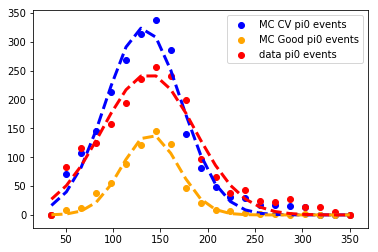

In [9]:
# Pause and do a gaussian fit to the distributions
var_mcpi0_numu = df_MC_all['_pi0mass_new'].values
weightsmc =[ df_MC_all['pi0_weight'].values[i]*df_MC_all['pot_weight'].values[i]*df_MC_all['xsec_corr_weight'].values[i] for i  in range(len(var_mcpi0_numu))]
var_mcpi0_good = df_MC_goodpi0['_pi0mass_new'].values
weightsgood =[ df_MC_goodpi0['pi0_weight'].values[i]*df_MC_goodpi0['pot_weight'].values[i]*df_MC_goodpi0['xsec_corr_weight'].values[i] for i  in range(len(var_mcpi0_good))]
var_datapi0_numu = df_data_total['_pi0mass'].values

# set up histograms
mc_y,mc_x = np.histogram(var_mcpi0_numu,bins = 20, range = myrange, weights=weightsmc)
mc_y = list(mc_y)
mc_y =ar([0]+mc_y)
good_y,good_x = np.histogram(var_mcpi0_good,bins = 20, range = myrange, weights=weightsgood)
good_y = list(good_y)
good_y =ar([0]+good_y)
data_y,data_x = np.histogram(var_datapi0_numu,bins = 20, range = myrange)
data_y = list(data_y)
data_y =ar([0]+data_y)


#general fit format, any function. You could use 'gaus' as above, or some other function f you can define
#popt,pcov = curve_fit(FUNCTION,x,y,p0 = [the fittable parameters defined in your function. these are just seeds]
#this will work fine unless your seeds are wildly far from the best answer
mc_mean = sum(mc_x*mc_y)/sum(mc_y)
mc_sigma = np.sqrt(sum(mc_y * (mc_x - mc_mean)**2) / sum(mc_y))
mc_p0 = [0, mc_mean,mc_sigma]
mc_popt,mc_pcov = curve_fit(SF.gaus,mc_x,mc_y,p0=mc_p0,maxfev = 100000000)
good_mean = sum(good_x*good_y)/sum(good_y)
good_sigma = np.sqrt(sum(good_y * (good_x - good_mean)**2) / sum(good_y))
good_p0 = [0, good_mean,good_sigma]
good_popt,good_pcov = curve_fit(SF.gaus,good_x,good_y,p0=good_p0,maxfev = 100000000)
#popt is the fitted parameter array, pcov is the covariance array
data_mean = sum(data_x*data_y)/sum(data_y)
data_sigma = np.sqrt(sum(data_y * (data_x - data_mean)**2) / sum(data_y))
data_p0 = [0, data_mean,data_sigma]
data_popt,data_pcov = curve_fit(SF.gaus,data_x,data_y,p0=data_p0,maxfev = 100000000)


print ('MC CV Fitted Gaussian mean = ', mc_popt[1])
print ('MC CV Fitted Gaussian error = ', sqrt(mc_pcov[1,1]))
print ('MC CV Fitted Guassian standard deviation  ', mc_popt[2])
print ('MC CV Fitted Gaussian error = ', sqrt(mc_pcov[2,2]))
plt.scatter(mc_x,mc_y,color='blue',marker='o',label='MC CV pi0 events')
plt.plot(mc_x,SF.gaus(mc_x,*mc_popt),ls='--',lw=3,color='blue')
print ('MC Good Pi0 Fitted Gaussian mean = ', good_popt[1])
print ('MC Good Pi0 Fitted Guassian standard deviation  ', good_popt[2])
plt.scatter(good_x,good_y,color='orange',marker='o',label='MC Good pi0 events')
plt.plot(good_x,SF.gaus(good_x,*good_popt),ls='--',lw=3,color='orange')
print ('data Fitted Gaussian mean = ', data_popt[1])
print ('data CV Fitted Gaussian error = ', sqrt(data_pcov[1,1]))
print ('data Fitted Guassian standard deviation  ', data_popt[2])
print ('data CV Fitted Gaussian error = ', sqrt(data_pcov[2,2]))
plt.scatter(data_x,data_y,color='red',marker='o',label='data pi0 events')
plt.plot(data_x,SF.gaus(data_x,*data_popt),ls='--',lw=3,color='red')

plt.legend(loc='upper right')
plt.show()



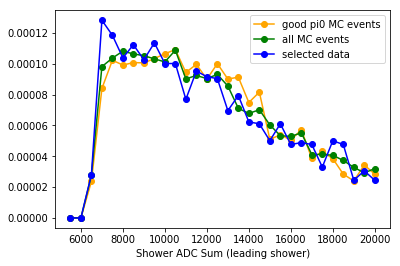

In [10]:
# plot of ADC distributions
adc_good_mc = df_MC_goodpi0['shower1_sumQ_Y'].values
adc_good_mc_weights = df_MC_goodpi0['pi0_weight'].values

adc_all_mc = df_MC_all['shower1_sumQ_Y'].values
adc_all_mc_weights = df_MC_all['pi0_weight'].values

adc_data = df_data_total['shower1_sumQ_Y'].values

good_Hist,binedges = np.histogram( adc_good_mc, bins = 30, range = [5000,20000],weights = adc_good_mc_weights, density =True)
bincenters = np.ones(len(binedges)-1)
for i in range(len(binedges)-1):
    bincenters[i] = binedges[i]+(15000.0/30.0)
    
all_Hist,binedges = np.histogram( adc_all_mc, bins = 30, range = [5000,20000],weights = adc_all_mc_weights,density =True)
data_Hist,binedges = np.histogram( adc_data, bins = 30, range = [5000,20000],density =True)

plt.plot(bincenters,good_Hist,color = 'orange', marker = 'o', label = 'good pi0 MC events')
plt.plot(bincenters,all_Hist,color = 'green', marker = 'o', label = 'all MC events')
plt.plot(bincenters,data_Hist,color = 'blue', marker = 'o', label = 'selected data')

plt.xlabel("Shower ADC Sum (leading shower)")
plt.legend()
plt.show()
plt.close()

best fit slope:  0.012294 chi2:  4694.90317814461 /ndof:  3039 =  1.5448842310446234
range[ 0.012244 , 0.012343999999999999 ]


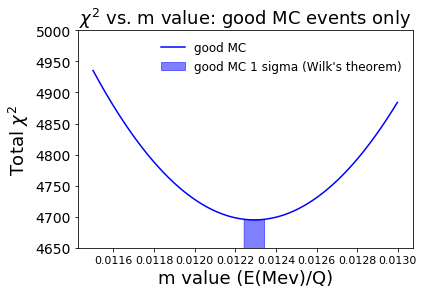

In [11]:
# first do good MC events
slopes_2D = [i*2e-6+.0115 for i in range(750)]
# shift = -0.000267

minval_good = 10000000000
minslope_low_good = -999999
minslope_high_good = -999999

square_vals = [0.0 for i in range(750)]

for i in range(len(slopes_2D)):

    chi2 = findSlopeandBias(df_MC_goodpi0,slopes_2D[i],weight=True)
    square_vals[i]=chi2

    if(chi2<minval_good):
        minval_good = chi2
        minslope_good = slopes_2D[i]

print("best fit slope: ", minslope_good ,"chi2: ",minval_good,"/ndof: ",len(df_MC_goodpi0),"= ",minval_good/float(len(df_MC_goodpi0)))

fig, ax = plt.subplots()
plt.plot(slopes_2D,square_vals,label="good MC",color ="blue")

y_min_good =[]
y_max_good =[]
x_tmp_good=[]
for i in range(len(square_vals)):
    if (square_vals[i] - minval_good <1.0):
        y_min_good.append(4000)
        y_max_good.append(square_vals[i])
        x_tmp_good.append(slopes_2D[i])


plt.fill_between(x_tmp_good, y_min_good, y_max_good, alpha=.5,color = 'blue',label = "good MC 1 sigma (Wilk's theorem)")


minallowed_val_good = 1
maxallowed_val_good = -1

for i in range(len(slopes_2D)):
    if (square_vals[i] - minval_good <1.0):
        if (slopes_2D[i]> maxallowed_val_good):
            maxallowed_val_good = slopes_2D[i]
        if (slopes_2D[i]< minallowed_val_good):
            minallowed_val_good = slopes_2D[i] 
print("range[",minallowed_val_good,",",maxallowed_val_good,"]")
 
plt.ylim(4650,5000)    
ax.set_xlabel("m value (E(Mev)/Q)", fontsize=18)
ax.set_ylabel("Total $\chi^2$",fontsize=18)
ax.set_title("$\chi^2$ vs. m value: good MC events only",fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=14) 
ax.legend(loc='upper right',fontsize=12,frameon=False,ncol=1)
plt.savefig('mfit_good.png')



best fit slope:  0.011581999999999999 chi2:  25310.293432541184 /ndof:  9473 =  2.671835050410766
range[ 0.011554 , 0.011607999999999999 ]


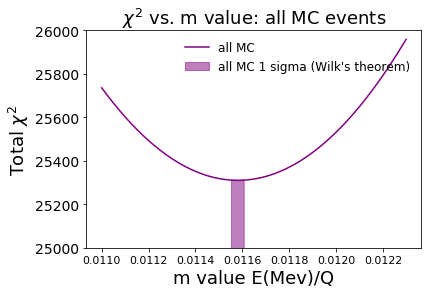

In [12]:
# next all MC
minval_all = 10000000000
minslope_low_all = -999999
minslope_high_all = -999999

slopes_2D = [i*2e-6+.011 for i in range(650)]

square_vals = [0.0 for i in range(650)]

for i in range(len(slopes_2D)):

    chi2 = findSlopeandBias(df_MC_all,slopes_2D[i],weight=True)
    square_vals[i]=chi2

    if(chi2<minval_all):
        minval_all = chi2
        minslope_all = slopes_2D[i]

print("best fit slope: ", minslope_all ,"chi2: ",minval_all,"/ndof: ",len(df_MC_all),"= ",minval_all/float(len(df_MC_all)))

fig, ax = plt.subplots()
plt.plot(slopes_2D,square_vals,color = 'purple',label = "all MC")

minallowed_val_all = 1
maxallowed_val_all = -1

y_min =[]
y_max =[]
x_tmp=[]
for i in range(len(square_vals)):
    if (square_vals[i] - minval_all <1.0):
        y_min.append(4000)
        y_max.append(square_vals[i])
        x_tmp.append(slopes_2D[i])
plt.fill_between(x_tmp, y_min, y_max, alpha=.5,color = 'purple',label = "all MC 1 sigma (Wilk's theorem)")

for i in range(len(slopes_2D)):
    if (square_vals[i] - minval_all <1.0):
        if (slopes_2D[i]> maxallowed_val_all):
            maxallowed_val_all = slopes_2D[i]
        if (slopes_2D[i]< minallowed_val_all):
            minallowed_val_all = slopes_2D[i] 
print("range[",minallowed_val_all,",",maxallowed_val_all,"]")

plt.ylim(25000,26000)    
ax.set_xlabel("m value E(Mev)/Q", fontsize=18)
ax.set_ylabel("Total $\chi^2$",fontsize=18)
ax.set_title("$\chi^2$ vs. m value: all MC events",fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=14) 
ax.legend(loc='upper right',fontsize=12,frameon=False,ncol=1)
plt.savefig('mfit_all.png')


best fit slope:  0.011647999999999999 chi2:  5984.734648630378 /ndof:  1973 =  3.033317105235873
range[ 0.011585999999999999 , 0.01171 ]
shift the data
bestfit =  0.01236
min =  0.012275999999999999
max =  0.012446


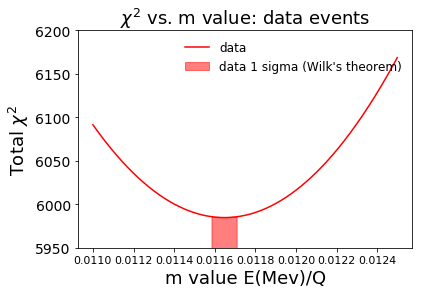

In [13]:
# finally data
minval_data = 10000000000
minslope_low_data = -999999
minslope_high_data = -999999

square_vals = [0.0 for i in range(750)]
slopes_2D = [i*2e-6+.011 for i in range(750)]

for i in range(len(slopes_2D)):

    chi2 = findSlopeandBias(df_data_total,slopes_2D[i])
    square_vals[i]=chi2

    if(chi2<minval_data):
        minval_data = chi2
        minslope_data = slopes_2D[i]

print("best fit slope: ", minslope_data ,"chi2: ",minval_data,"/ndof: ",len(df_data_total),"= ",minval_data/float(len(df_data_total)))

fig, ax = plt.subplots()
plt.plot(slopes_2D,square_vals,color = 'red',label = "data")

minallowed_val_data = 1
maxallowed_val_data = -1

y_min =[]
y_max =[]
x_tmp=[]
for i in range(len(square_vals)):
    if (square_vals[i] - minval_data <1.0):
        y_min.append(4000)
        y_max.append(square_vals[i])
        x_tmp.append(slopes_2D[i])
plt.fill_between(x_tmp, y_min, y_max, alpha=.5,color = 'red',label = "data 1 sigma (Wilk's theorem)")

for i in range(len(slopes_2D)):
    if (square_vals[i] - minval_data <1.0):
        if (slopes_2D[i]> maxallowed_val_data):
            maxallowed_val_data = slopes_2D[i]
        if (slopes_2D[i]< minallowed_val_data):
            minallowed_val_data = slopes_2D[i] 
print("range[",minallowed_val_data,",",maxallowed_val_data,"]")
    
plt.ylim(5950,6200)    
ax.set_xlabel("m value E(Mev)/Q", fontsize=18)
ax.set_ylabel("Total $\chi^2$",fontsize=18)
ax.set_title("$\chi^2$ vs. m value: data events",fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=14) 
ax.legend(loc='upper right',fontsize=12,frameon=False,ncol=1)
plt.savefig('mfit_data.png')

print("shift the data")
print("bestfit = ",minslope_data-(minslope_all-minslope_good) )
print("min = ",minallowed_val_data-(minallowed_val_all-minallowed_val_good) )
print("max = ",maxallowed_val_data-(maxallowed_val_all-maxallowed_val_good) )




# Detector variation samples

In [14]:
# load in all the run3 pickles
run = 'run3'
datafolder = '/media/disk1/kmason/detvars_highstats'
tag = '2021-02-10'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYAtt','LYRayleigh','SCE','wiremodThetaYZ','wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
    i+=1
    a_df_sys.append(df_sys.query("isCV==False"))
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))


total 327918, cv = 315002 dv = 12916
total 327860, cv = 315002 dv = 12858
total 12348, cv = 5823 dv = 6525
total 325739, cv = 315002 dv = 10737
total 325976, cv = 315002 dv = 10974
total 327469, cv = 315002 dv = 12467
total 11684, cv = 5823 dv = 5861
total 327883, cv = 315002 dv = 12881
total 326568, cv = 315002 dv = 11566


In [15]:
# first cut all samples
cuts = 'PassPMTPrecut ==1 and PassShowerReco ==1 and InFiducial ==1 and _pi0mass_new<300 and DeltaMass_new >0 and DeltaMass_new <1400 and NTracks ==2 and Proton_Edep>60.0  and Electron_Edep>35.0  and shower1_E_Y_new>80 and ChargeNearTrunk >250 and Electron_ThetaRecoB_e1ep <1.5 and _shower_alpha <2.5 and _pi0mass_new>0 and BDTscore_1e1p<.7'
lengths = [] # list of lengths of each cut sample
names = [] # list of names of each sample
dfs = [] #list of dfs

df_run3_pi0_WiremodX = a_df_sys[0].query(cuts)
df_run3_pi0_WiremodYZ = a_df_sys[1].query(cuts)
df_run3_pi0_Recomb = a_df_sys[2].query(cuts)
df_run3_pi0_LYDown = a_df_sys[3].query(cuts)
df_run3_pi0_LYAtt = a_df_sys[4].query(cuts)
df_run3_pi0_LYRayleigh = a_df_sys[5].query(cuts)
df_run3_pi0_SCE = a_df_sys[6].query(cuts)
df_run3_pi0_WiremodThetaYZ = a_df_sys[7].query(cuts)
df_run3_pi0_WiremodThetaXZ = a_df_sys[8].query(cuts)


lengths.append(len(df_run3_pi0_LYDown))
names.append("LYDown")
dfs.append(df_run3_pi0_LYDown)
lengths.append(len(df_run3_pi0_LYAtt))
names.append("LYAtt")
dfs.append(df_run3_pi0_LYAtt)
lengths.append(len(df_run3_pi0_LYRayleigh))
names.append("LYRayleigh")
dfs.append(df_run3_pi0_LYRayleigh)
lengths.append(len(df_run3_pi0_Recomb))
names.append("Recomb")
dfs.append(df_run3_pi0_Recomb)
lengths.append(len(df_run3_pi0_SCE))
names.append("SCE")
dfs.append(df_run3_pi0_SCE)
lengths.append(len(df_run3_pi0_WiremodThetaXZ))
names.append("wiremodThetaXZ")
dfs.append(df_run3_pi0_WiremodThetaXZ)
lengths.append(len(df_run3_pi0_WiremodThetaYZ))
names.append("wiremodThetaYZ")
dfs.append(df_run3_pi0_WiremodThetaYZ)
lengths.append(len(df_run3_pi0_WiremodYZ))
names.append("wiremodYZ")
dfs.append(df_run3_pi0_WiremodYZ)
lengths.append(len(df_run3_pi0_WiremodX))
names.append("wiremodX")
dfs.append(df_run3_pi0_WiremodX)


print(lengths)
print(names)

[3553, 3565, 3993, 2051, 1921, 3842, 3998, 4051, 4192]
['LYDown', 'LYAtt', 'LYRayleigh', 'Recomb', 'SCE', 'wiremodThetaXZ', 'wiremodThetaYZ', 'wiremodYZ', 'wiremodX']


LYDown
LYAtt
LYRayleigh
Recomb
SCE
wiremodThetaXZ
wiremodThetaYZ
wiremodYZ
wiremodX
[0.012145999999999999, 0.012329999999999999, 0.012197999999999999, 0.012201999999999998, 0.012373999999999998, 0.012289999999999999, 0.012107999999999999, 0.012341999999999999, 0.012491999999999998]
[4.4000000000000636e-05, 4.4000000000000636e-05, 4.200000000000037e-05, 5.999999999999929e-05, 6.199999999999956e-05, 4.4000000000000636e-05, 4.200000000000037e-05, 4.200000000000037e-05, 4.200000000000037e-05]
[4.39999999999989e-05, 4.5999999999999167e-05, 4.39999999999989e-05, 5.800000000000076e-05, 6.399999999999982e-05, 4.1999999999998636e-05, 4.1999999999998636e-05, 4.1999999999998636e-05, 4.4000000000000636e-05]


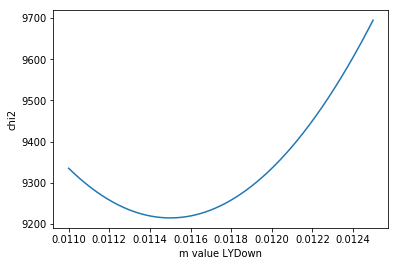

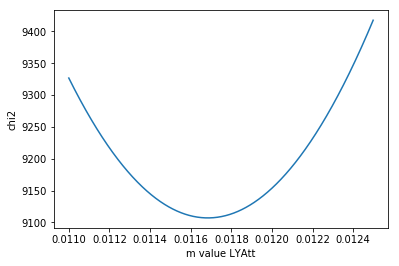

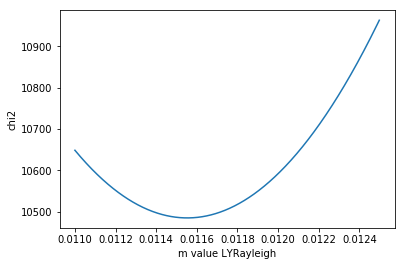

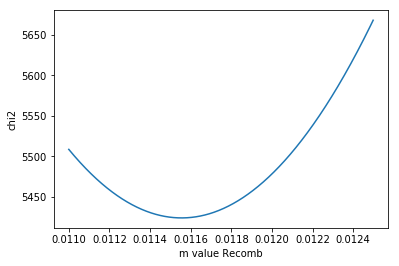

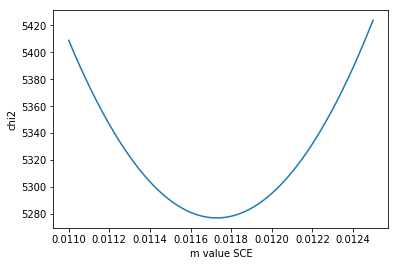

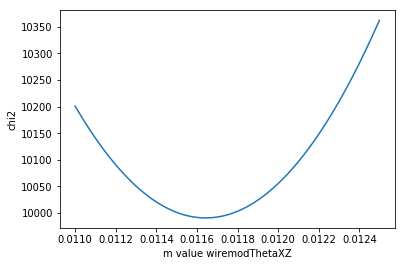

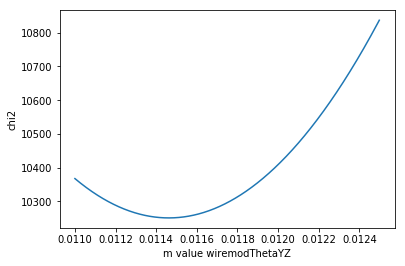

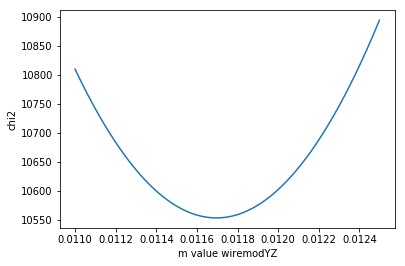

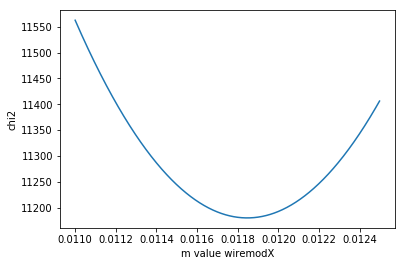

In [16]:
#  now calculate the minchi2 and range for each sample
# shift = allmc - good mc 
shift = 0.01165 -0.012296
mins = []
min_low = []
min_high = []

for idx in range(len(dfs)):
    print(names[idx])
    square_vals = np.zeros(len(slopes_2D)) 
    minval = 10000000000
    minslope = -999999
    X = slopes_2D

    for i in range(len(slopes_2D)):
     
        chi2 = findSlopeandBias(dfs[idx],slopes_2D[i])
        square_vals[i]=chi2

        if(chi2<minval):
            minval = chi2
            minslope = slopes_2D[i]
            
    minallowed_val = 1
    maxallowed_val = -1
    mins.append(minslope-shift)
    
    for i in range(len(slopes_2D)):
        if (square_vals[i] - minval <1.0):
            if (slopes_2D[i]> maxallowed_val):
                maxallowed_val = slopes_2D[i]
            if (slopes_2D[i]< minallowed_val):
                minallowed_val = slopes_2D[i] 

    min_low.append(minslope - minallowed_val)
    min_high.append(-1*(minslope - maxallowed_val))

    fig, ax = plt.subplots()
    plt.plot(slopes_2D,square_vals)

    ax.set_xlabel("m value " + names[idx])
    ax.set_ylabel("chi2" )
    
print(mins)
print(min_low)
print(min_high)

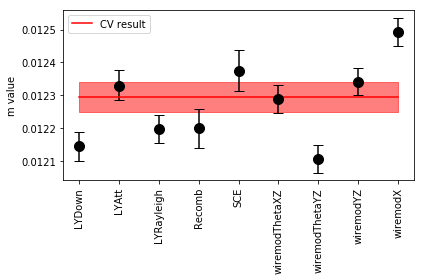

In [17]:
# put into a single plot
fig, ax = plt.subplots()
ax.errorbar(names,mins,fmt='o',yerr=[min_low ,min_high],color='black',capsize=5,markersize = 10)

y_value = [0.012296 for i in range(9)]
y_min = [0.012251 for i in range(9)]
y_max = [ 0.012341 for i in range(9)]

plt.fill_between(names, y_min, y_max, alpha=.5,color = 'red')
plt.plot(names,y_value,color = "red", label = "CV result")
ax.set_ylabel("m value" )
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('detvar.png')



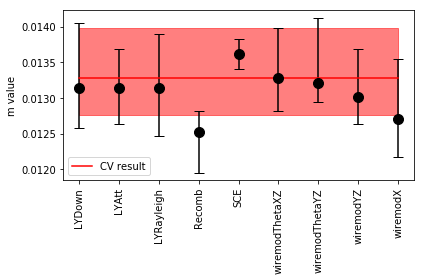

In [19]:
# michel version of detvar plot

# LYDown: 0.0131418 (0.0125786->0.0140505) / 0.0001 / 0.01 / 1000.01 / 0.84
# LYAtt: 0.0131418 (0.0126388->0.0136865) / 0.0251 / 12.01 / 500.01 / 0.83
# LYRayleigh: 0.0131418 (0.0124599->0.0139026) / 0.0251 / 12.01 / 500.01 / 0.83
# Rec2: 0.012519 (0.0119525->0.0128228) / 0.0001 / 4.51 / 800.01 / 0.85
# SCE: 0.013616 (0.0134086->0.0138298) / 0.1751 / 15.01 / 0.01 / 0.85
# ThetaXZ:  0.0132739 (0.0128228->0.0139762) / 0.0001 / 9.01 / 800.01 / 0.83
# ThetaYZ:  0.0132075 (0.0129485->0.0141257) / 0.0001 / 0.01 / 1000.01 / 0.8
# YZ: 0.0130123 (0.0126388->0.0136865) / 0.0501 / 6.01 / 900.01 / 0.87
# X:  0.0126995 (0.0121728->0.0135462) / 0.2001 / 13.51 / 600.01 / 0.87
    
mins_michel =[0.0131418,0.0131418,0.0131418,0.012519,0.013616,0.0132739,0.0132075,0.0130123,0.0126995]
min_low_michel=[0.0125786,0.0126388,0.0124599,0.0119525,0.0134086,0.0128228,0.0129485,0.0126388,0.0121728]
min_high_michel = [0.0140505,0.0136865,0.0139026,0.0128228,0.0138298,0.0139762,0.0141257,0.0136865,0.0135462]

min_low_michel_diff =[]
for i in range(len(min_low_michel)):
    min_low_michel_diff.append(abs(mins_michel[i]-min_low_michel[i]))
    
min_high_michel_diff =[]
for i in range(len(min_high_michel)):
    min_high_michel_diff.append(abs(mins_michel[i]-min_high_michel[i]))
    
# put into a single plot
fig, ax = plt.subplots()
ax.errorbar(names,mins_michel,fmt='o',yerr=[min_low_michel_diff ,min_high_michel_diff],color='black',capsize=5,markersize = 10)

y_value = [0.0132739 for i in range(9)]
y_min = [0.0127609 for i in range(9)]
y_max = [0.0139762 for i in range(9)]

plt.fill_between(names, y_min, y_max, alpha=.5,color = 'red')
plt.plot(names,y_value,color = "red", label = "CV result")
ax.set_ylabel("m value" )
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('detvar_michel.png')


In [18]:
# get error bar values
total = 0
for i in range(9):
    diff = mins[i] -0.012296 
    total += diff**2

print("detector error: ", sqrt(total))

# LYD_s = (min_low[0]/(0.012251)-mins[0]/0.012296)**2
# LYA_s = (min_low[1]/(0.012251)-mins[1]/0.012296)**2
# LYR_s = (min_low[2]/(0.012251)-mins[2]/0.012296)**2
# REC_s = (min_low[3]/(0.012251)-mins[3]/0.012296)**2
# SCE_s = (min_low[4]/(0.012251)-mins[4]/0.012296)**2
# TXZ_s = (min_low[5]/(0.012251)-mins[5]/0.012296)**2
# TYZ_s = (min_low[6]/(0.012251)-mins[6]/0.012296)**2
# YZ_s = (min_low[7]/(0.012251)-mins[7]/0.012296)**2
# X_s  = (min_low[8]/(0.012251)-mins[8]/0.012296)**2

# LYD_r = mins[0]/0.012296-1.0
# LYA_r =mins[1]/0.012296-1.0
# LYR_r =mins[2]/0.012296-1.0
# REC_r = mins[3]/0.012296-1.0
# SCE_r =mins[4]/0.012296-1.0
# TXZ_r = mins[5]/0.012296-1.0
# TYZ_r = mins[6]/0.012296-1.0
# YZ_r = mins[7]/0.012296-1.0
# X_r  = mins[8]/0.012296-1.0

# r_v = [LYD_r, LYA_r, LYR_r, REC_r, SCE_r, TXZ_r, TYZ_r, YZ_r, X_r]
# s_v = [LYD_s, LYA_s, LYR_s, REC_s, SCE_s, TXZ_s, TYZ_s, YZ_s, X_s]

# # solving for x numerically...

# def SolveX(r_v,s_v,x):
#     sum = 0
#     for i in range(9):
#         sum+=(r_v[i]**2)/(s_v[i]+x**2)
# #         print(r_v[i],s_v[i],(r_v[i]**2)/(s_v[i]+x**2))
# #     print(sum)  
#     return sum

# SolveX(r_v,s_v,0)

# x_test = [i*0.00001+0 for i in range(1000)]
# sum_v = np.zeros(len(x_test))

# for i in range(len(x_test)):
#     x = x_test[i]
#     tot = SolveX(r_v,s_v,x)
#     print(tot)
#     sum_v[i]=abs(9-tot)

# fig, ax = plt.subplots()
# plt.plot(x_test,sum_v)

# ax.set_xlabel("x value")
# ax.set_ylabel("result" )


detector error:  0.0003524840421919829


In [19]:
# # nick's version of plot
# x_ticks=['LYDown','LYAtt','LYRayleigh','Rec2','SCE',
#          'ThetaXZ','ThetaYZ','YZ','X']
# x = [1,2,3,4,5,6,7,8,9]
# x_ = [0] + x + [10]
# ax.errorbar(names,mins,fmt='o',yerr=[min_low ,min_high],color='black',capsize=5,markersize = 10)
# plt.fill_between(x_,(maxallowed_val_data-(maxallowed_val_all-maxallowed_val_good))*np.ones_like(x_),
#                 (minallowed_val_data-(minallowed_val_all-minallowed_val_good))*np.ones_like(x_),alpha=.3,
#                 color='red',label='CV')
# plt.plot(x_,minslope_data-(minslope_all-minslope_good)*np.ones_like(x_),color='red')
# #Set number of ticks for x-axis
# ax.set_xticks(x)
# # Set ticks labels for x-axis
# ax.set_xticklabels(x_ticks, rotation='vertical', fontsize=12)
# plt.legend()
# plt.ylabel('Energy/charge confeversion factor')
# plt.tight_layout()
# plt.savefig('systematics.png')
# plt.show()

Data sigmas: [0.49863863333064445, 0.550113039911695]
MC sigmas: [0.3179299248741431, 2.7567031152451325, 0.33692945888217324]


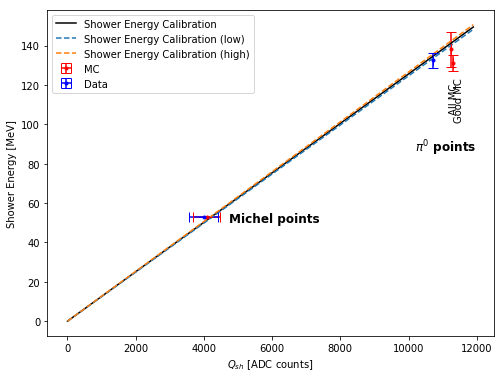

In [20]:
pi0_sys =  sqrt(total)
sys_error = 395.979797464

pi0_mid_mc = 0.011585
pi0_low_mc = 0.011558
pi0_high_mc = 0.011603
pi0_adc_mc = 11312


pi0_mid_gmc = 0.012296
pi0_low_gmc = 0.012251
pi0_high_gmc = 0.012341
pi0_adc_gmc = 11232

pi0_mid_data = 0.011648+(pi0_mid_gmc-pi0_mid_mc)
pi0_low_data = 0.011594+(pi0_low_gmc-pi0_low_mc)
pi0_high_data = 0.011702+(pi0_high_gmc-pi0_high_mc)
pi0_adc_data = 10728

michel_cutoff_mid_mc = 4080
michel_cutoff_low_mc = 4040
michel_cutoff_high_mc = 4130

michel_cutoff_mid_data = 3990
michel_cutoff_low_data = 3810
michel_cutoff_high_data = 4170

mpi0_high_mc = pi0_mid_mc + np.sqrt((pi0_high_mc-pi0_mid_mc)**2 + pi0_sys**2)
mpi0_low_mc = pi0_mid_mc - np.sqrt((pi0_low_mc-pi0_mid_mc)**2 + pi0_sys**2)
mpi0_high_gmc = pi0_mid_gmc + np.sqrt((pi0_high_mc-pi0_mid_gmc)**2 + pi0_sys**2)
mpi0_low_gmc = pi0_mid_gmc - np.sqrt((pi0_low_mc-pi0_mid_gmc)**2 + pi0_sys**2)
mpi0_high_data = pi0_mid_data + np.sqrt((pi0_high_data-pi0_mid_data)**2 + pi0_sys**2)
mpi0_low_data = pi0_mid_data - np.sqrt((pi0_low_data-pi0_mid_data)**2 + pi0_sys**2)
                                   

MeV_vals_mc = np.array([105.66/2,pi0_mid_mc*pi0_adc_mc,pi0_mid_gmc*pi0_adc_gmc])
MeV_vals_high_mc = np.array([105.66/2,mpi0_high_mc*pi0_adc_mc,mpi0_high_gmc*pi0_adc_gmc])
MeV_errs_high_mc = np.sqrt((MeV_vals_high_mc-MeV_vals_mc)**2)
MeV_vals_low_mc = np.array([105.66/2,mpi0_low_mc*pi0_adc_mc,mpi0_low_gmc*pi0_adc_gmc])
MeV_errs_low_mc = np.sqrt((MeV_vals_low_mc-MeV_vals_mc)**2)

ADC_vals_mc = np.array([michel_cutoff_mid_mc,pi0_adc_mc,pi0_adc_gmc])
ADC_vals_high_mc = np.array([michel_cutoff_high_mc,pi0_adc_mc,pi0_adc_gmc])
ADC_errs_high_mc = np.sqrt((ADC_vals_high_mc-ADC_vals_mc)**2 + np.array([sys_error,0,0])**2)
ADC_vals_low_mc = np.array([michel_cutoff_low_mc,pi0_adc_mc,pi0_adc_gmc])
ADC_errs_low_mc = np.sqrt((ADC_vals_low_mc-ADC_vals_mc)**2 + np.array([sys_error,0,0])**2)


MeV_vals_data = np.array([105.66/2,pi0_mid_data*pi0_adc_data])
MeV_vals_high_data = np.array([105.66/2,mpi0_high_data*pi0_adc_data])
MeV_errs_high_data = np.sqrt((MeV_vals_high_data-MeV_vals_data)**2)
MeV_vals_low_data = np.array([105.66/2,mpi0_low_data*pi0_adc_data])
MeV_errs_low_data = np.sqrt((MeV_vals_low_data-MeV_vals_data)**2)

ADC_vals_data = np.array([michel_cutoff_mid_data,pi0_adc_data])
ADC_vals_high_data = np.array([michel_cutoff_high_data,pi0_adc_data])
ADC_errs_high_data = np.sqrt((ADC_vals_high_data-ADC_vals_data)**2 + np.array([sys_error,0])**2)
ADC_vals_low_data = np.array([michel_cutoff_low_data,pi0_adc_data])
ADC_errs_low_data = np.sqrt((ADC_vals_low_data-ADC_vals_data)**2 + np.array([sys_error,0])**2)

sigmas_data = []
sigmas_mc = []

pi0_mode='new'
    
def invCalibLine(E,pi0_mode):
    if 'old' in pi0_mode:
        return (E - 2.06955) / 0.013456 
    elif 'new' in pi0_mode:
        return E/0.01255796
    
def calibLine(ADC,pi0_mode):
    if 'old' in pi0_mode:
        return 0.013456*ADC + 2.06955
    elif 'new' in pi0_mode:
        return 0.01255796*ADC 
def calibLine_error(ADC,pi0_mode,error):
    if 'old' in pi0_mode:
        return (0.013456+error)*ADC + 2.06955
    elif 'new' in pi0_mode:
        return (0.01255796+error)*ADC 
    
if invCalibLine(MeV_vals_data[0],pi0_mode) > ADC_vals_data[0]:
    sigmas_data.append((invCalibLine(MeV_vals_data[0],pi0_mode)-ADC_vals_data[0])/ADC_errs_high_data[0])
else:
    sigmas_data.append((-invCalibLine(MeV_vals_data[0],pi0_mode)+ADC_vals_data[0])/ADC_errs_low_data[0])
if calibLine(ADC_vals_data[1],pi0_mode) > MeV_vals_data[1]:
        sigmas_data.append((calibLine(ADC_vals_data[1],pi0_mode)-MeV_vals_data[1])/MeV_errs_high_data[1])
else:
    sigmas_data.append((-calibLine(ADC_vals_data[1],pi0_mode)+MeV_vals_data[1])/MeV_errs_low_data[1])
                       
if invCalibLine(MeV_vals_mc[0],pi0_mode) > ADC_vals_mc[0]:
    sigmas_mc.append((invCalibLine(MeV_vals_mc[0],pi0_mode)-ADC_vals_mc[0])/ADC_errs_high_mc[0])
else:
    sigmas_mc.append((-invCalibLine(MeV_vals_mc[0],pi0_mode)+ADC_vals_mc[0])/ADC_errs_low_mc[0])
for i in [1,2]:
    if calibLine(ADC_vals_mc[i],pi0_mode) > MeV_vals_mc[i]:
        sigmas_mc.append((calibLine(ADC_vals_mc[i],pi0_mode)-MeV_vals_mc[i])/MeV_errs_high_mc[i])
    else:
        sigmas_mc.append((-calibLine(ADC_vals_mc[i],pi0_mode)+MeV_vals_mc[i])/MeV_errs_low_mc[i])
                     
print('Data sigmas:',sigmas_data)
print('MC sigmas:',sigmas_mc)

ADCrange = np.arange(0,12000,100)

fig, ax = plt.subplots(figsize=(8,6))
#plt.plot(ADCrange,oldCalib(ADCrange),label='Old Shower Energy Calibration',color='orange')
plt.plot(ADCrange,calibLine(ADCrange,pi0_mode),label='Shower Energy Calibration',color='black')
plt.plot(ADCrange,calibLine_error(ADCrange,pi0_mode,-0.0001),'--',label='Shower Energy Calibration (low)')
plt.plot(ADCrange,calibLine_error(ADCrange,pi0_mode,0.0001),'--',label='Shower Energy Calibration (high)')
plt.xlabel(r'$Q_{sh}$ [ADC counts]')
plt.ylabel('Shower Energy [MeV]')
plt.errorbar(ADC_vals_mc,MeV_vals_mc,
             xerr=(ADC_errs_low_mc,ADC_errs_high_mc),
             yerr=(MeV_errs_low_mc,MeV_errs_high_mc),
             fmt='.',capsize=5,label='MC',color='red')
plt.errorbar(ADC_vals_data,MeV_vals_data,
             xerr=(ADC_errs_low_data,ADC_errs_high_data),
             yerr=(MeV_errs_low_data,MeV_errs_high_data),
             fmt='.',capsize=5,label='Data',color='blue')
plt.text(1.15*ADC_vals_high_mc[0],0.95*MeV_vals_mc[0],"Michel points",fontsize=12,weight='bold',bbox=dict(alpha=0.9,facecolor='white', edgecolor='white'))
plt.text(0.95*ADC_vals_data[1],0.67*MeV_vals_low_data[1],r"$\pi^0$ points",fontsize=12,weight='bold',bbox=dict(alpha=0.9,facecolor='white', edgecolor='white'))
plt.text(0.99*ADC_vals_mc[1],0.92*MeV_vals_low_mc[1],"All MC",fontsize=10,rotation=90)
plt.text(1.01*ADC_vals_mc[2],0.93*MeV_vals_low_mc[2],"Good MC",fontsize=10,rotation=90)


plt.legend()
plt.savefig('TestPointShowerCalib.png')
plt.show()

0.0012792719222433982
[0.0013111292775054904, 0.0014589313070271722, 0.0003528809997718778, 0.0003410703739699477]
[0.0013592192216490685, 0.0013913734654518973, 0.00034296501279285036, 0.0003410703739699477]


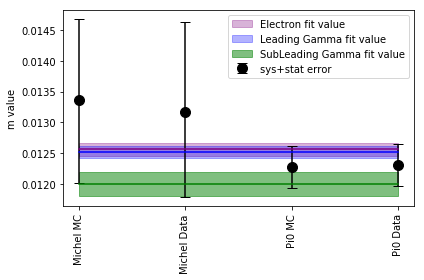

In [22]:
# make simple point plot

names =['Michel MC', 'Michel Data', 'Pi0 MC','Pi0 Data']
xMC = 52.8/0.01317
diffMCmin = (sqrt((4010-3960)**2+(sys_error)**2))/xMC
diffMCmax = (sqrt((4010-4130)**2+(sys_error)**2))/xMC

xdata = 52.8/0.01337
diffdatamin = (sqrt((3950-3780)**2+(sys_error)**2))/xdata
diffdatamax = (sqrt((3950-4060)**2+(sys_error)**2))/xdata

print(diffMCmin*0.01285)
# min_low = [sqrt((4110-4050)**2+(sys_error)**2),0.01324-52.8/sqrt((3990-3810)**2+(sys_error)**2),sqrt((0.01227-0.01220)**2 +0.00396**2),sqrt((0.01165-0.01160)**2 +0.00396**2)]
# min_high = [0.01285-52.8/sqrt((4110-4180)**2+(sys_error)**2),0.01324-52.8/sqrt((3990-4710)**2+(sys_error)**2),sqrt((0.01227-0.01232)**2 +0.00396**2),sqrt((0.01165-0.01170)**2 +0.00396**2)]
min_low = [diffMCmin*0.01317,diffdatamin*.01337,sqrt((0.012296-0.012251)**2 +0.00035**2),sqrt((0.011585-0.011558)**2 +0.00034**2)]
min_low_stat = [abs(0.012949-0.012792),abs(0.01324-0.012669),abs(0.012296-0.012251),abs(0.011585-0.011558)]
min_low_sys = [abs(0.012949-0.012792),abs(0.01324-0.012669),0.00035,0.00035]
min_high = [diffMCmax*0.01317,diffdatamax*.01337,sqrt((0.012296-0.012251)**2 +0.00034**2),sqrt((0.011585-0.011558)**2 +0.00034**2)]
min_high_stat = [abs(0.012949-0.012792),abs(0.01324-0.012669),abs(0.012296-0.012251),abs(0.011585-0.011558)]
min_high_sys = [abs(0.012949-0.012792),abs(0.01324-0.012669),0.00035,0.00035]

min_best = [0.01337,0.01317,0.01227,0.01231] 
print(min_low)
print(min_high)
fig, ax = plt.subplots()
ax.errorbar(names,min_best,fmt='o',yerr=[min_high,min_low],color='black',capsize=5,markersize = 10,label ="sys+stat error")
# ax.errorbar(names,min_best,fmt='o',yerr=[min_high_stat,min_low_stat],color='black',capsize=5,markersize = 10,label = "stat error only")
# ax.errorbar(names,min_best,fmt='o',yerr=[min_high_sys,min_low_sys],color='red',capsize=5,markersize = 10)

y_value = [0.01256 for i in range(4)]
y_min = [0.01256-.0001 for i in range(4)]
y_max = [ 0.01256+.0001 for i in range(4)]

y1_value = [0.01252 for i in range(4)]
y1_min = [0.01252-.0001 for i in range(4)]
y1_max = [ 0.01252+.0001 for i in range(4)]

y2_value = [0.01200 for i in range(4)]
y2_min = [0.01200-.0002 for i in range(4)]
y2_max = [ 0.01200+.0002 for i in range(4)]


plt.fill_between(names, y_min, y_max, alpha=.3,color = 'purple',label="Electron fit value")
plt.plot(names,y_value,color = "purple")
plt.fill_between(names, y1_min, y1_max, alpha=.3,color = 'blue',label="Leading Gamma fit value")
plt.plot(names,y1_value,color = "blue")
plt.fill_between(names, y2_min, y2_max, alpha=.5,color = 'green',label="SubLeading Gamma fit value")
plt.plot(names,y2_value,color = "green")
ax.set_ylabel("m value" )
plt.xticks(rotation=90)
plt.legend()
# plt.show()
plt.tight_layout()
plt.savefig('showercalibration.png')


In [25]:
A = 0.012
print("michel MC: ", abs(min_best[0]-A)/(min_low[0]))
print("michel data: ", abs(min_best[1]-A)/(min_low[1]))
print("Pi0 MC: ", abs(min_best[2]-A)/(min_low[2]))
print("Pi0 data: ", abs(min_best[3]-A)/(min_low[3]))

michel MC:  1.0449007763799727
michel data:  0.801956880604666
Pi0 MC:  0.7651304552371555
Pi0 data:  0.9089033339122974
